In [1]:
# suppressing warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importing all the data sets
df1 = pd.read_csv("Leads.csv")

In [4]:
df1.head(5).T

0  \
Prospect ID                                    7927b2df-8bba-4d29-b9a2-b6e0beafe620   
Lead Number                                                                  660737   
Lead Origin                                                                     API   
Lead Source                                                              Olark Chat   
Do Not Email                                                                     No   
Do Not Call                                                                      No   
Converted                                                                         0   
TotalVisits                                                                     0.0   
Total Time Spent on Website                                                       0   
Page Views Per Visit                                                            0.0   
Last Activity                                               Page Visited on Website   
Country                                                                         NaN   
Specialization                                                               Select   
How did you hear about X Education                                           Select   
What is your current occupation                                          Unemployed   
What matters most to you in choosing a course               Better Career Prospects   
Search                                                                           No   
Magazine                                                                         No   
Newspaper Article                                                                No   
X Education Forums                                                               No   
Newspaper                                                                        No   
Digital Advertisement                                                            No   
Through Recommendations                                                          No   
Receive More Updates About Our Courses                                           No   
Tags                                                    Interested in other courses   
Lead Quality                                                       Low in Relevance   
Update me on Supply Chain Content                                                No   
Get updates on DM Content                                                        No   
Lead Profile                                                                 Select   
City                                                                         Select   
Asymmetrique Activity Index                                               02.Medium   
Asymmetrique Profile Index                                                02.Medium   
Asymmetrique Activity Score                                                    15.0   
Asymmetrique Profile Score                                                     15.0   
I agree to pay the amount through cheque                                         No   
A free copy of Mastering The Interview                                           No   
Last Notable Activity                                                      Modified   

                                                                                  1  \
Prospect ID                                    2a272436-5132-4136-86fa-dcc88c88f482   
Lead Number                                                                  660728   
Lead Origin                                                                     API   
Lead Source                                                          Organic Search   
Do Not Email                                                                     No   
Do Not Call                                                                      No   
Converted                                                                         0   
TotalVisits                                                                    

In [5]:
# checking the dimension of the df
df1.shape

(9240, 37)

In [6]:
#Step 1 - get count, size and number of unique values in each column
# count/size is the %age missing values
df1.agg(['count','size','nunique'])

Prospect ID  Lead Number  Lead Origin  Lead Source  Do Not Email  \
count           9240         9240         9240         9204          9240   
size            9240         9240         9240         9240          9240   
nunique         9240         9240            5           21             2   

         Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
count           9240       9240         9103                         9240   
size            9240       9240         9240                         9240   
nunique            2          2           41                         1731   

         Page Views Per Visit  ...  Get updates on DM Content  Lead Profile  \
count                    9103  ...                       9240          6531   
size                     9240  ...                       9240          9240   
nunique                   114  ...                          1             6   

         City  Asymmetrique Activity Index  Asymmetrique Profile Index  \
count    7820                         5022                        5022   
size     9240                         9240                        9240   
nunique     7                            3                           3   

         Asymmetrique Activity Score  Asymmetrique Profile Score  \
count                           5022                        5022   
size                            9240                        9240   
nunique                           12                          10   

         I agree to pay the amount through cheque  \
count                                        9240   
size                                         9240   
nunique                                         1   

         A free copy of Mastering The Interview  Last Notable Activity  
count                                      9240                   9240  
size                                       9240                   9240  
nunique                                       2                     16  

[3 rows x 37 columns]

In [7]:
col_summary = df1.agg(['count','size','nunique']).transpose().reset_index()
col_summary['perc_missing']=100.0*(1-col_summary['count']/col_summary['size'])
col_summary

index  count  size  nunique  \
0                                     Prospect ID   9240  9240     9240   
1                                     Lead Number   9240  9240     9240   
2                                     Lead Origin   9240  9240        5   
3                                     Lead Source   9204  9240       21   
4                                    Do Not Email   9240  9240        2   
5                                     Do Not Call   9240  9240        2   
6                                       Converted   9240  9240        2   
7                                     TotalVisits   9103  9240       41   
8                     Total Time Spent on Website   9240  9240     1731   
9                            Page Views Per Visit   9103  9240      114   
10                                  Last Activity   9137  9240       17   
11                                        Country   6779  9240       38   
12                                 Specialization   7802  9240       19   
13             How did you hear about X Education   7033  9240       10   
14                What is your current occupation   6550  9240        6   
15  What matters most to you in choosing a course   6531  9240        3   
16                                         Search   9240  9240        2   
17                                       Magazine   9240  9240        1   
18                              Newspaper Article   9240  9240        2   
19                             X Education Forums   9240  9240        2   
20                                      Newspaper   9240  9240        2   
21                          Digital Advertisement   9240  9240        2   
22                        Through Recommendations   9240  9240        2   
23         Receive More Updates About Our Courses   9240  9240        1   
24                                           Tags   5887  9240       26   
25                                   Lead Quality   4473  9240        5   
26              Update me on Supply Chain Content   9240  9240        1   
27                      Get updates on DM Content   9240  9240        1   
28                                   Lead Profile   6531  9240        6   
29                                           City   7820  9240        7   
30                    Asymmetrique Activity Index   5022  9240        3   
31                     Asymmetrique Profile Index   5022  9240        3   
32                    Asymmetrique Activity Score   5022  9240       12   
33                     Asymmetrique Profile Score   5022  9240       10   
34       I agree to pay the amount through cheque   9240  9240        1   
35         A free copy of Mastering The Interview   9240  9240        2   
36                          Last Notable Activity   9240  9240       16   

    perc_missing  
0       0.000000  
1       0.000000  
2       0.000000  
3       0.389610  
4       0.000000  
5       0.000000  
6       0.000000  
7       1.482684  
8       0.000000  
9       1.482684  
10      1.114719  
11     26.634199  
12     15.562771  
13     23.885281  
14     29.112554  
15     29.318182  
16      0.000000  
17      0.000000  
18      0.000000  
19      0.000000  
20      0.000000  
21      0.000000  
22      0.000000  
23      0.000000  
24     36.287879  
25     51.590909  
26      0.000000  
27      0.000000  
28     29.318182  
29     15.367965  
30     45.649351  
31     45.649351  
32     45.649351  
33     45.649351  
34      0.000000  
35      0.000000  
36      0.000000

In [8]:
print("Dataset has " +str(len(col_summary))+ " columns and " + str(len(df1))+ " rows")
print(str(len(col_summary[col_summary['perc_missing']>0])) +" have atleast one missing value")
print( str(len(col_summary[col_summary['perc_missing']>30])) +" have atleast more than 30% missing values")
print( str(len(col_summary[col_summary['perc_missing']>50])) +" have atleast more than 50% missing values")

Dataset has 37 columns and 9240 rows
17 have atleast one missing value
6 have atleast more than 30% missing values
1 have atleast more than 50% missing values


In [9]:
temp_df = col_summary[col_summary['perc_missing']>0]
temp_df.head(5)

index  count  size  nunique  perc_missing
3            Lead Source   9204  9240       21      0.389610
7            TotalVisits   9103  9240       41      1.482684
9   Page Views Per Visit   9103  9240      114      1.482684
10         Last Activity   9137  9240       17      1.114719
11               Country   6779  9240       38     26.634199

<AxesSubplot:xlabel='perc_missing', ylabel='index'>

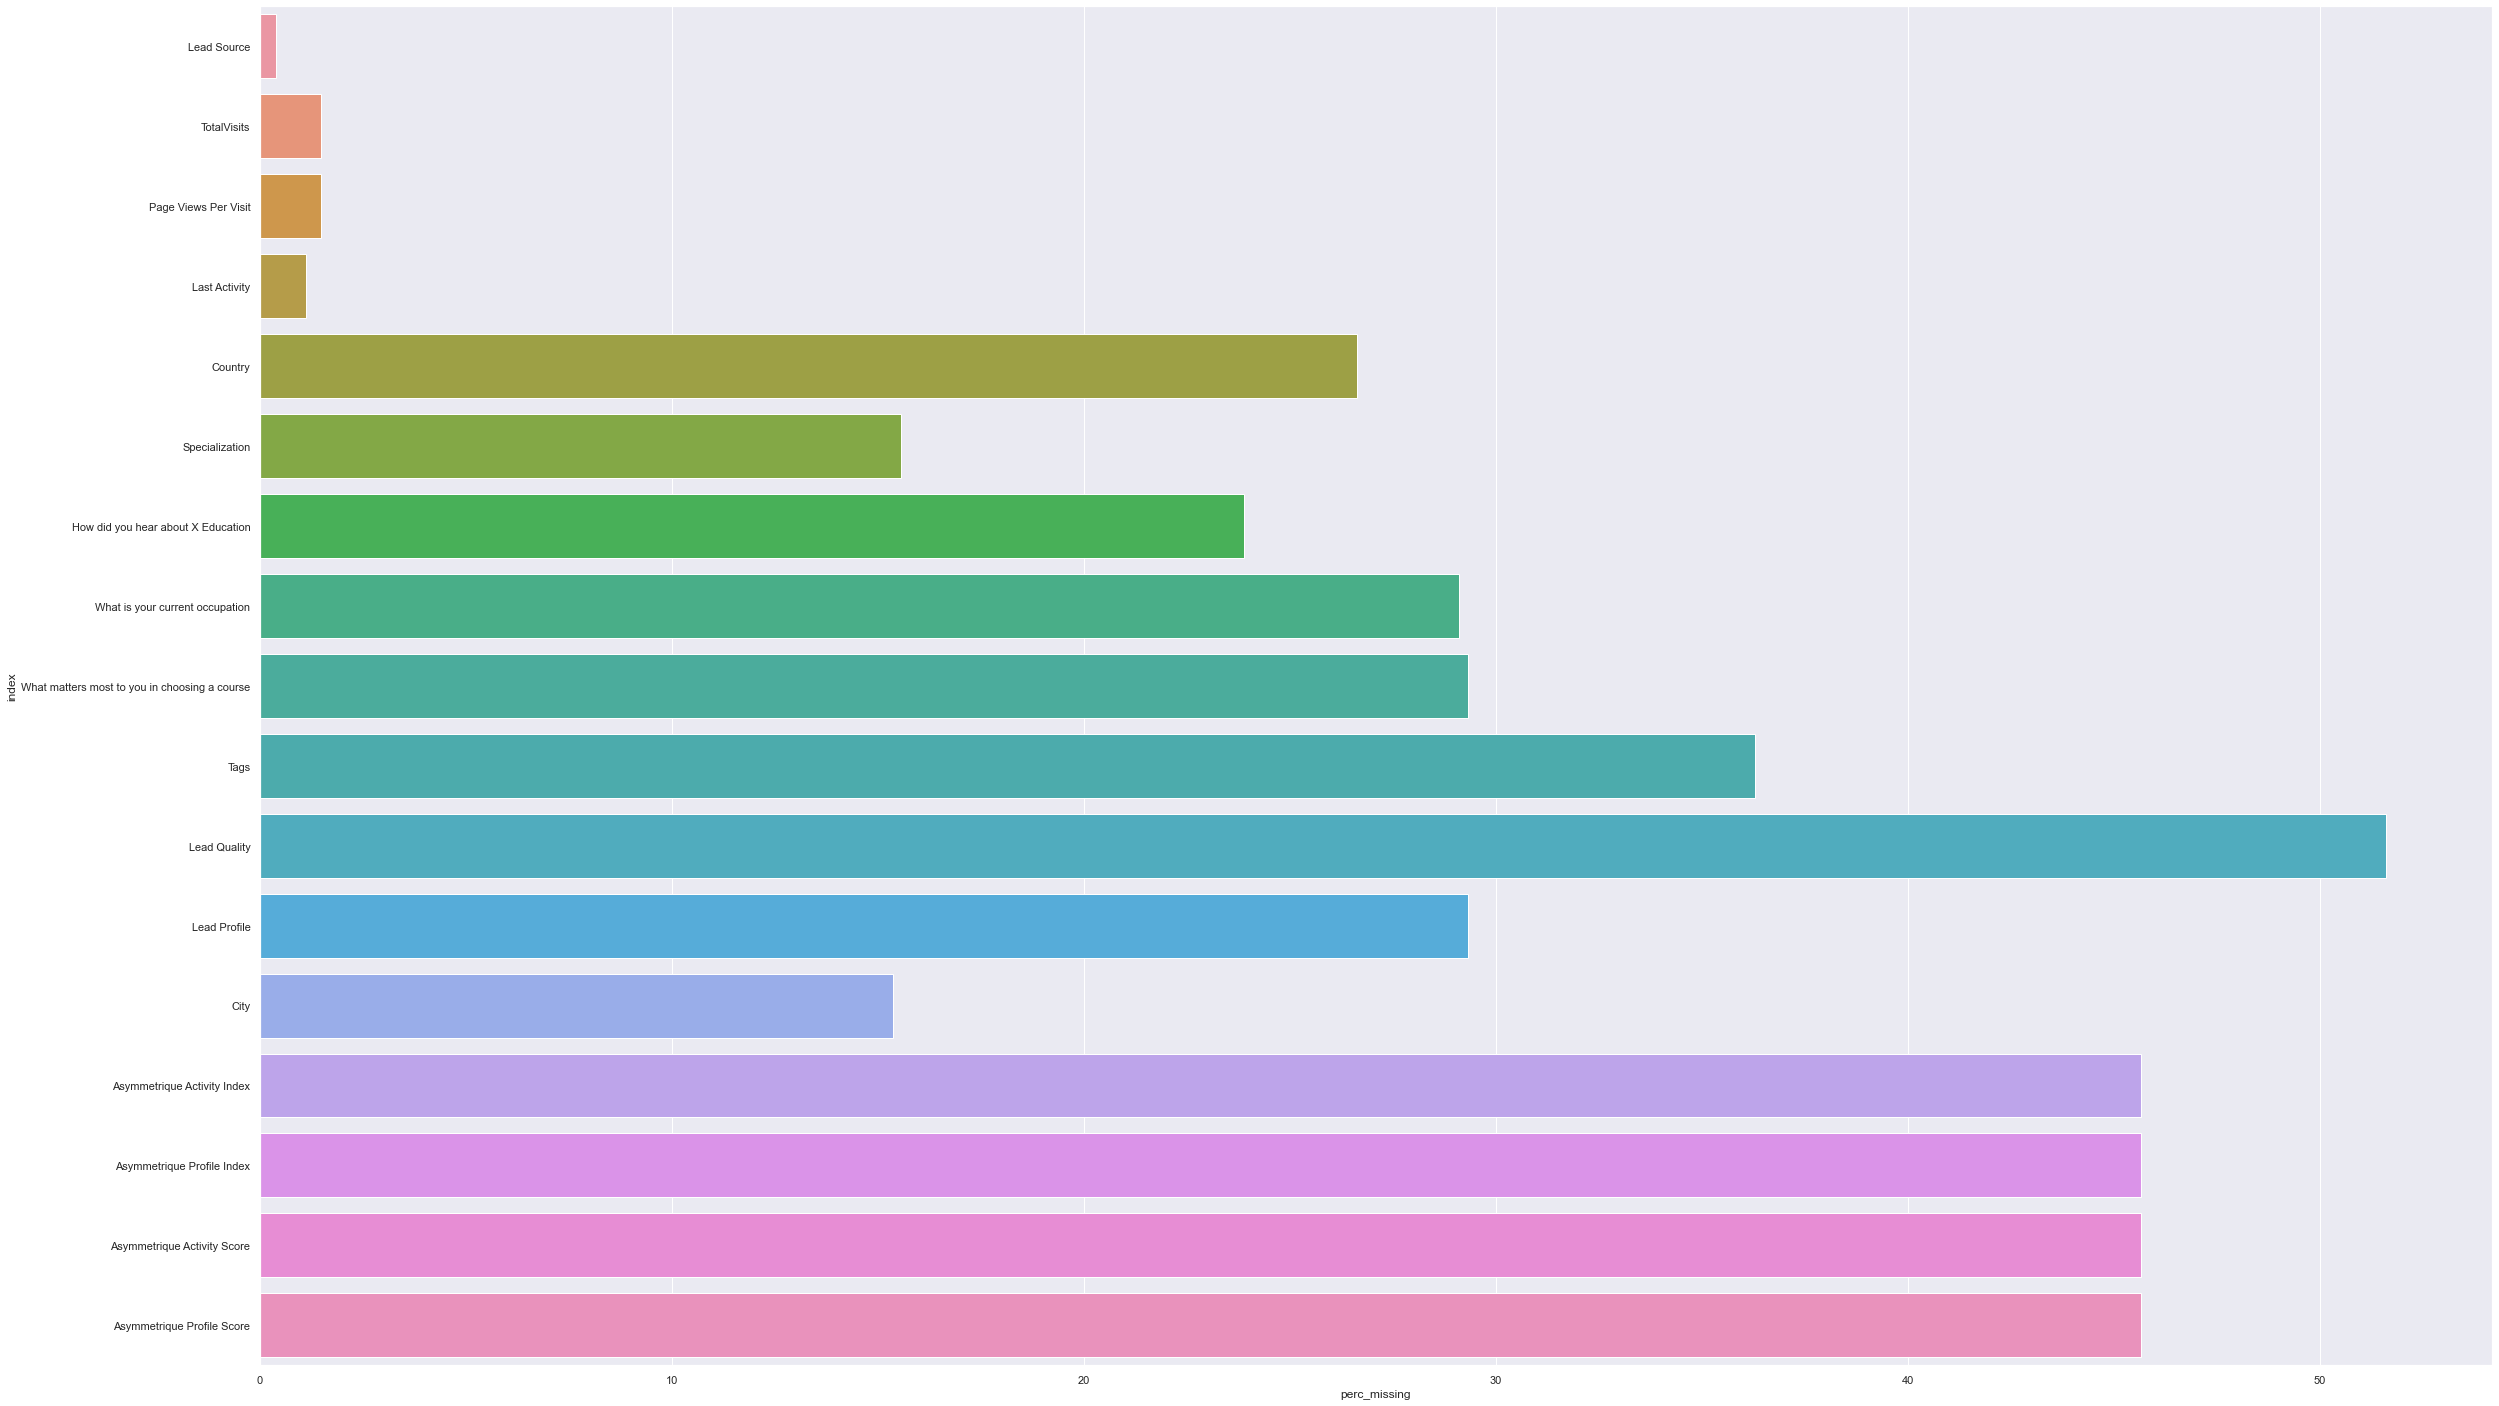

In [10]:
sns.set(rc = {'figure.figsize':(40,25)})
sns.barplot(x='perc_missing',y='index',orient = "h", data=temp_df)

In [11]:
# let's look at the statisticals aspect of the dataframe
df1.describe(include='all')

Prospect ID    Lead Number  \
count                                   9240    9240.000000   
unique                                  9240            NaN   
top     471e2bd1-ca89-4cf0-b89a-8d4994e967ff            NaN   
freq                                       1            NaN   
mean                                     NaN  617188.435606   
std                                      NaN   23405.995698   
min                                      NaN  579533.000000   
25%                                      NaN  596484.500000   
50%                                      NaN  615479.000000   
75%                                      NaN  637387.250000   
max                                      NaN  660737.000000   

                    Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   
mean                        NaN         NaN          NaN         NaN   
std                         NaN         NaN          NaN         NaN   
min                         NaN         NaN          NaN         NaN   
25%                         NaN         NaN          NaN         NaN   
50%                         NaN         NaN          NaN         NaN   
75%                         NaN         NaN          NaN         NaN   
max                         NaN         NaN          NaN         NaN   

          Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9103.000000                  9240.000000   
unique          NaN          NaN                          NaN   
top             NaN          NaN                          NaN   
freq            NaN          NaN                          NaN   
mean       0.385390     3.445238                   487.698268   
std        0.486714     4.854853                   548.021466   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                    12.000000   
50%        0.000000     3.000000                   248.000000   
75%        1.000000     5.000000                   936.000000   
max        1.000000   251.000000                  2272.000000   

        Page Views Per Visit  ... Get updates on DM Content Lead Profile  \
count            9103.000000  ...                      9240         6531   
unique                   NaN  ...                         1            6   
top                      NaN  ...                        No       Select   
freq                     NaN  ...                      9240         4146   
mean                2.362820  ...                       NaN          NaN   
std                 2.161418  ...                       NaN          NaN   
min                 0.000000  ...                       NaN          NaN   
25%                 1.000000  ...                       NaN          NaN   
50%                 2.000000  ...                       NaN          NaN   
75%                 3.000000  ...                       NaN          NaN   
max                55.000000  ...                       NaN          NaN   

          City Asymmetrique Activity Index Asymmetrique Profile Index  \
count     7820                        5022                       5022   
unique       7                           3                          3   
top     Mumbai                   02.Medium                  02.Medium   
freq      3222                        3839                       2788   
mean       NaN                         NaN                        NaN   
std        NaN                         NaN                        NaN   
min        NaN                         NaN                        NaN   
25%        NaN                         NaN                        NaN   
50%        NaN                         NaN                  

In [12]:
# Let's see the type of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
# checking for duplicate values if any

# Creating a copy of original dataframe for duplicate check
df_dup = df1

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape


(9240, 37)

In [14]:
# Finding/observations
# No duplicates found as the shape of df_dup and df1 are same.

- from above we can conclude that there are no junk values in the dataset
- from above e can also find the values which appear most time in specific column like india appear the most, which would help in treatment of missing values.
- we also got to know the list of columns which have select in them, as select means our prospect lead has not selected any of the options from the below, those columns are, -> Specialization,How did you hear about X Education, Lead Profile,City

In [15]:
# Replacing all the selects to NaN as the used didn't select any option from the list and 'select' is as good as 'NaN'

In [16]:
# select all the columns that have a "Select" entry
sel_cols = ['Specialization','How did you hear about X Education', 'Lead Profile','City']
            
df1[sel_cols]= df1[sel_cols].replace({'Select': np.NaN})

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
# now look for the percentage of missing values again
missing_val_column=df1.isna().sum()/len(df1)*100

In [19]:
missing_val_column

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [20]:
# Looking for the columns which are having more than 40 percent null value
missing_val_column=df1.isna().sum()/len(df1)*100
missing_val_column=missing_val_column[missing_val_column.values>40.0]
print(missing_val_column)
print(len(missing_val_column))

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64
7


In [21]:
#Removing all columns having more than 40% null values
df1.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], 
        axis = 1, inplace = True)

In [22]:
# Now we have dropped the column which have 40 percent as null value , now look for the remaning data
df1.shape

(9240, 30)

In [23]:
# Now again look for columns along with the missing values which are left with us.
missing_val_column=df1.isna().sum()/len(df1)*100
missing_val_column

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [24]:
# Handling missing values now,
# now we can do two things either we can impute missing values or drop missing values.
# i am opting for imputing missing values.

# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
df1['City'] = df1['City'].replace(np.nan, 'Mumbai')

# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
df1['Specialization'] = df1['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
df1['Tags'] = df1['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
df1['What is your current occupation'] = df1['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
df1['Country'] = df1['Country'].replace(np.nan, 'India')

In [25]:
# Now again look for columns along with the missing values which are left with us.
missing_val_column=df1.isna().sum()/len(df1)*100
missing_val_column

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [26]:
# since the remaining missing vales are quite less so we can drop them as it's not gonna impact much
df1.dropna(inplace=True)

In [27]:
# Now again look for columns along with the missing values which are left with us.
missing_val_column=df1.isna().sum()/len(df1)*100
missing_val_column

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [28]:
# From above we can conclude that there are no missing values left.

#### Checking value_counts() for entire dataframe.

#### This will help to identify any Unknow/Junk values present in the dataset

In [29]:
df1_dummy = df1.iloc[:,:]
#df1_dummy = df1.iloc[:,1:21] # iloc[rows:columns]

In [30]:
df1_dummy.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

In [31]:
for col in df1_dummy:
    print(df1_dummy[col].value_counts(normalize=True,ascending=False), '\n\n\n')

471e2bd1-ca89-4cf0-b89a-8d4994e967ff    0.00011
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    0.00011
6c958747-6f43-45ae-aec2-546de11e4711    0.00011
9ee0cb12-1da7-4285-8722-e6cae796ea91    0.00011
8051c7c4-9cb5-43da-ab91-e721102ce3c0    0.00011
                                         ...   
bcd6ae64-c2ba-4642-89e7-65c82cfabd2d    0.00011
8a85ad71-ecd3-4e0a-ae0b-955e6cba13de    0.00011
d44be6ba-5944-4b94-aa36-979eed590574    0.00011
dd4e1ca4-c873-4a10-aa40-70382835237a    0.00011
901bc48e-a7ea-4db2-bd75-4b679715401d    0.00011
Name: Prospect ID, Length: 9074, dtype: float64 



655360    0.00011
609951    0.00011
619195    0.00011
600768    0.00011
631489    0.00011
           ...   
585039    0.00011
648526    0.00011
625995    0.00011
580937    0.00011
608255    0.00011
Name: Lead Number, Length: 9074, dtype: float64 



Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: 

In [32]:
# Dropping columns as it's not gonna add any value to our target vaiable considering as the feedback of the people in this is Imbalanced.
df1 = df1.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'], axis=1)

In [33]:
df1.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags    City Last Notable Activity  
0          Interested in other courses  Mumbai              Modified  
1                              Ringing  Mumbai          Email Opened  
2  Will revert after reading the email  Mumbai          Email Opened  
3                              Ringing  Mumbai              Modified  
4  Will revert after reading the email  Mumbai              Modified

# **STEP 3: DATA PREPARATION**

** NOW WE WILL LOOK AT ENCODING **

- Dummy endcoding(We do this on normalize data, it means that there is no order in the data set, eg, gender, month.. etc )
- 1 hot enoding(label encoding) -> where there is two categories ("o" for one category and "1" for other category)

In [34]:
df1.shape

(9074, 14)

In [35]:
# List of numerical columns
list(df1.select_dtypes(include=[np.number]).columns.values)

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [36]:
# to look for list of categorical columns
df1.select_dtypes(include=['object']).columns.tolist()


['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

# Step 4: Exploratory Data Analysis

In [37]:
# Lets start with the target variable and see if we have any data imbalance or not 
df1["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

#### We have good representation of both the classes of data and hence we are good to go with the further analysis

In [38]:
# let's compare each variable with the target(Converted) varible one by one.

In [39]:
def _plot(df, input_feature, Converted):
    temp_df = df1.groupby(input_feature)[Converted].value_counts(normalize=True)
    
    plt.figure(figsize=(15,8))
    sns.countplot(df1[input_feature], hue=df1['Converted'])
    plt.xticks(rotation=45)
    plt.title(input_feature+" v/s Converted")
    plt.show()

    return plt

In [40]:
# Lead Origin V/s target
df1["Lead Origin"].value_counts(normalize=True)*100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

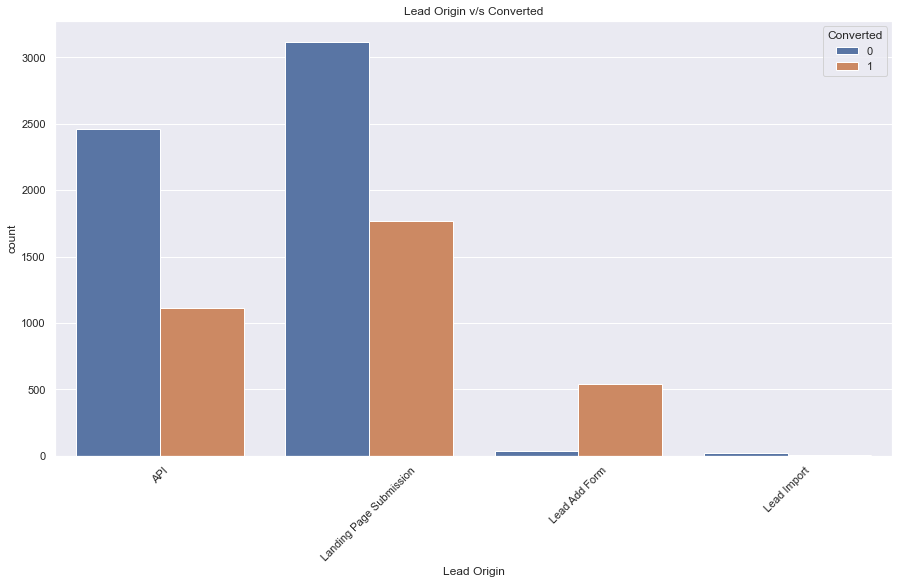

In [41]:
_plot(df1,"Lead Origin","Converted")
plt.show()

### Inferences
- From the information presented above, we can deduce that the number of leads generated by API and landing page submissions is significant, and that there is still room for conversion from these two sources.
- We can tell that while we have not received many leads from the Lead Add Form, the conversion rate is quite high. We can use the 'Lead Add Form' to try to get more leads.

In [42]:
# Lead Source V/s target
df1["Lead Source"].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Social Media          0.022041
Press_Release         0.022041
Live Chat             0.022041
Pay per Click Ads     0.011020
WeLearn               0.011020
testone               0.011020
youtubechannel        0.011020
welearnblog_Home      0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

In [43]:
# We can see from above that there is a significant chunk that contributes to very little conversion, thus grouping them all together under one category is a good idea.
df1['Lead Source'] = df1['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other')

df1['Lead Source'] = df1['Lead Source'].replace("google", 'Google')

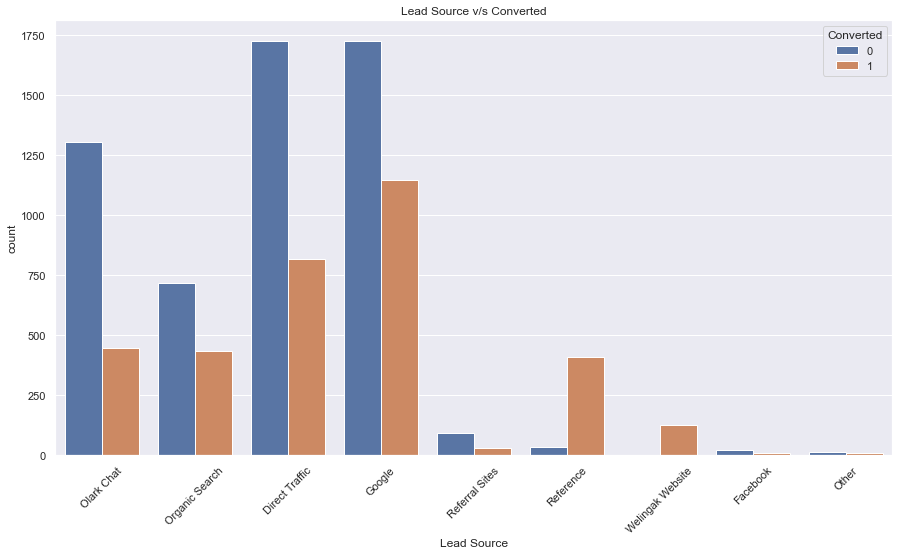

In [44]:
_plot(df1,"Lead Source","Converted")
plt.show()

### Inferences
- We can deduce from the above that Google generated a big number of leads, followed by Direct Traffic, Organic Search, and Olark Chat, and that there is still a lot of room for conversion.

- We can also see that the majority of leads come through referrals, followed by the Welingak website. We should focus more on growing the number of references and the Welingak Website.

In [45]:
# Last Activity V/s target
df1["Last Activity"].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Marked Spam                0.022041
Email Received                   0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In [46]:
# We can see from above that there is a significant chunk that contributes to very little conversion, thus grouping them all together under one category is a good idea.
df1['Last Activity'] = df1['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

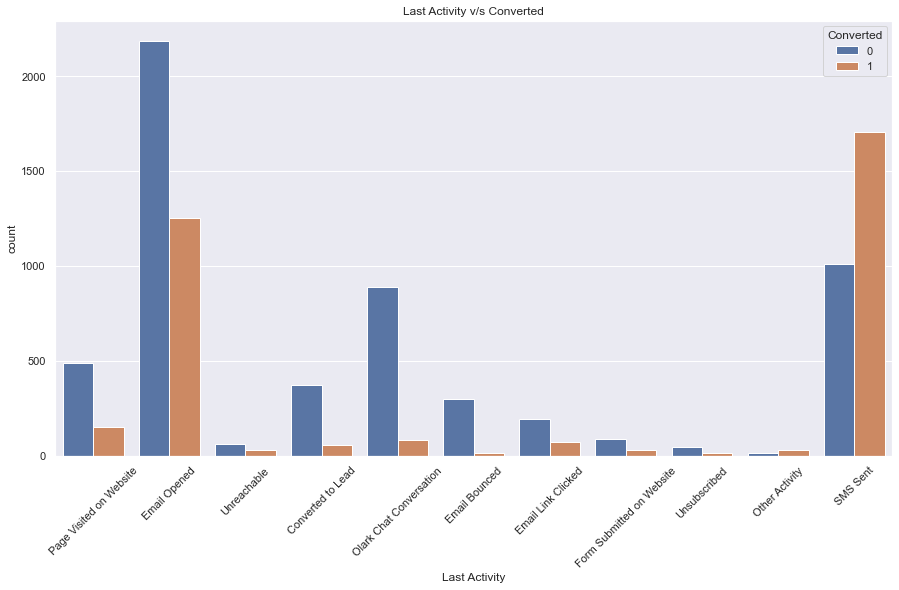

In [47]:
_plot(df1,"Last Activity","Converted")
plt.show()

# Inference
- We can deduce from the above that a large number of people have checked their emails. As a result, we should place a greater emphasis on lead conversion via the email opened variable, as it still has conversion potential.

- The conversion rate of sms sent is also high; we should put more effort into sending more sms because it will increase awareness and assist us create leads. This might be beneficial in the converting process.

In [48]:
# Specialization V/s target
df1["Specialization"].value_counts(normalize=True)*100

Other_Specialization                 36.169275
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

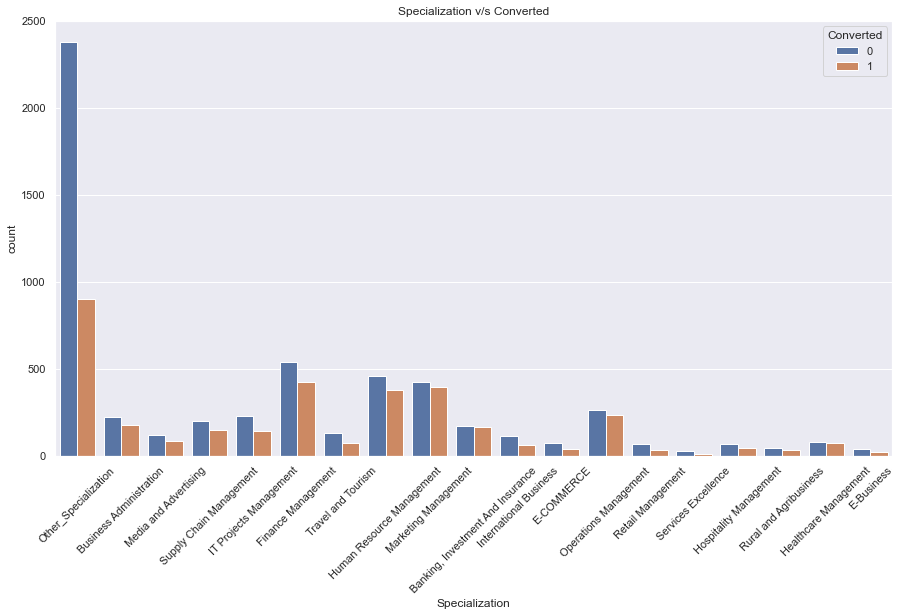

In [49]:
_plot(df1,"Specialization","Converted")
plt.show()

# Inference
- No inference as such can be made from specialisation as we can see that the conversion is high towards IT project management, followed by Human Resource management followed by tourist management, but still we can't focus on one varible(Specialisation) which would contribute towards increasing the conversion of leads.

In [50]:
# What is your current occupation v/s target variable.
df1["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

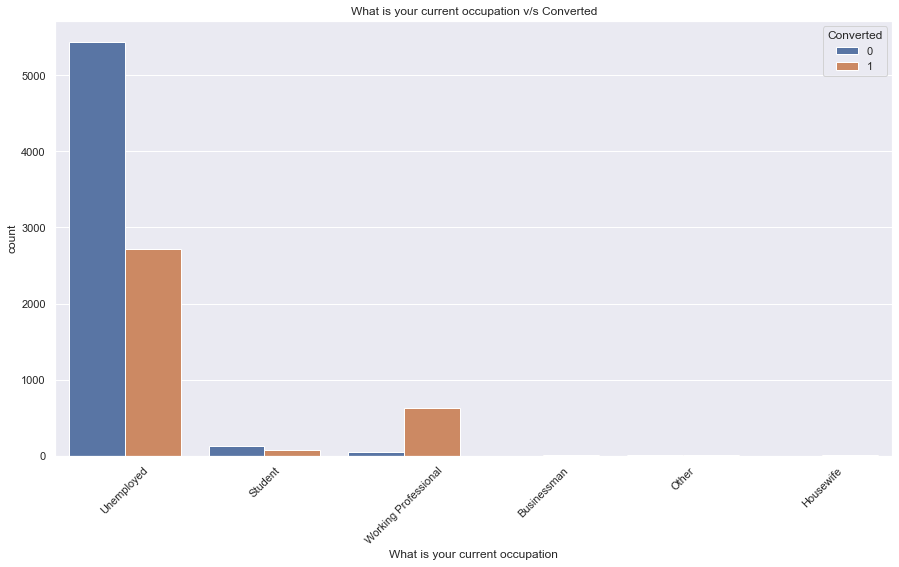

In [51]:
_plot(df1,"What is your current occupation","Converted")
plt.show()

### Inferences
- From above we can deduce that the conversion rate for the working professional is quite high which is very good though the number of count of leads are quite less, we should focus more on generating more leads towards the working professional

- We can observe that the number of Unemployed leads is rather high in comparison to the conversion rate, thus we should put more effort into converting such leads because they appear to have greater potential.

In [52]:
### Tags v/s target variable.
df1["Tags"].value_counts(normalize=True)*100

Will revert after reading the email                  58.882521
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0.363676
number not provided                                   0

In [53]:
# Converting all low count categories to Others category
df1['Tags'] = df1['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

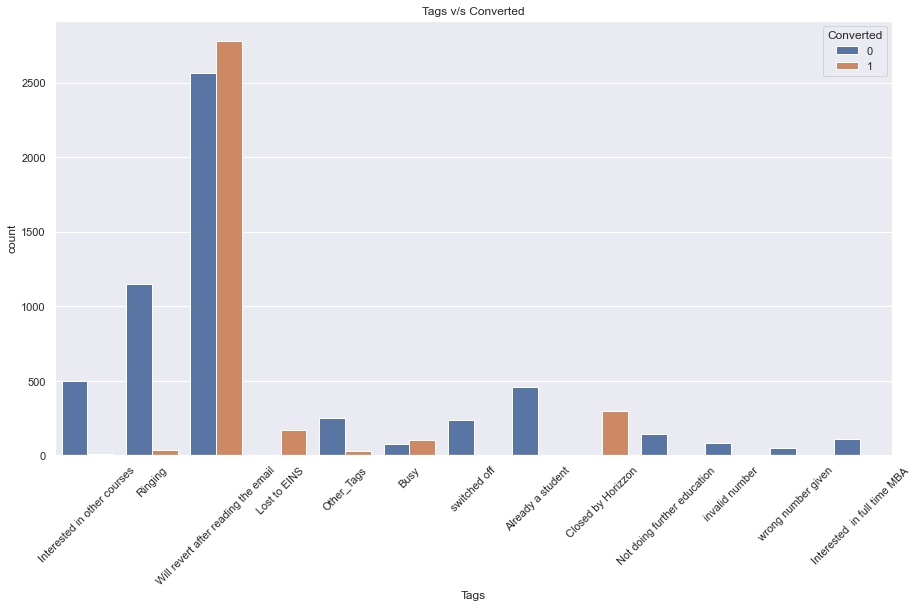

In [54]:
_plot(df1,"Tags","Converted")
plt.show()

## Inferences
- We can extrapolate from the above that one is Closed by horizon and the other is will revert after reading email, with the latter having the highest conversion rate.

In [55]:
# City V/s Target 
df1['City'].value_counts(normalize = True)*100

Mumbai                         74.410403
Thane & Outskirts               8.210271
Other Cities                    7.493939
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: City, dtype: float64

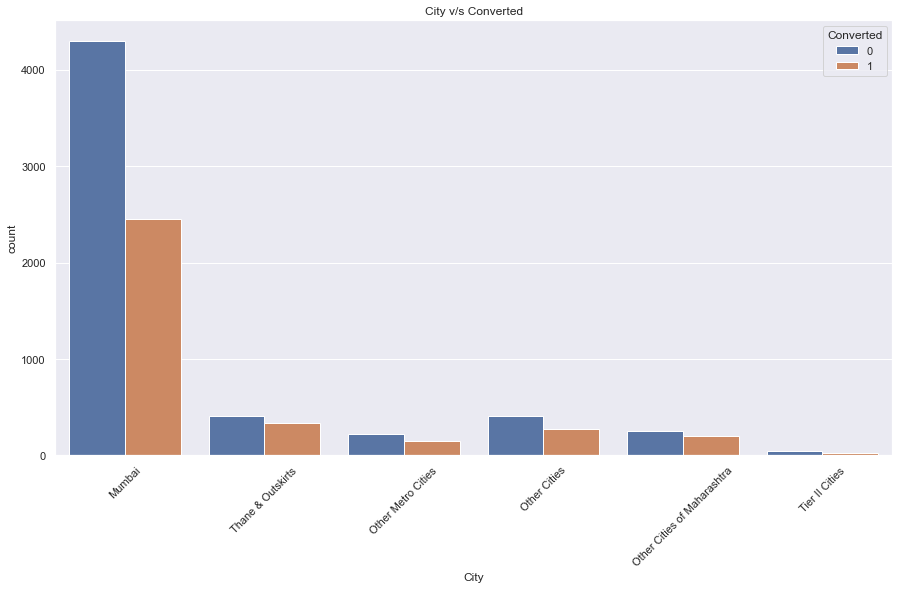

In [56]:
_plot(df1,"City","Converted")
plt.show()

### Inference
- We may deduce from the foregoing that Mumbai converts the majority of leads, followed by the remainder, and that there is still room for higher conversion rates in Mumbai.


In [57]:
# Last Notable Activity V/s Target
df1['Last Notable Activity'].value_counts(normalize = True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
View in browser link Clicked     0.011020
Approached upfront               0.011020
Form Submitted on Website        0.011020
Resubscribed to emails           0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

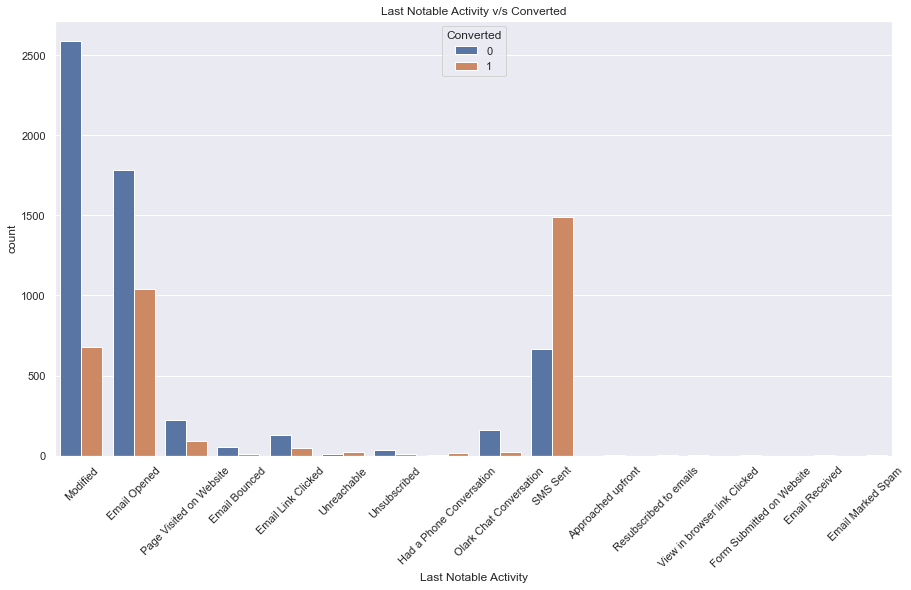

In [58]:
_plot(df1,"Last Notable Activity","Converted")
plt.show()

# Inference

Think again look similar to me as last activity column

In [59]:
#Now let's have a look a numerical columns
numlist = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

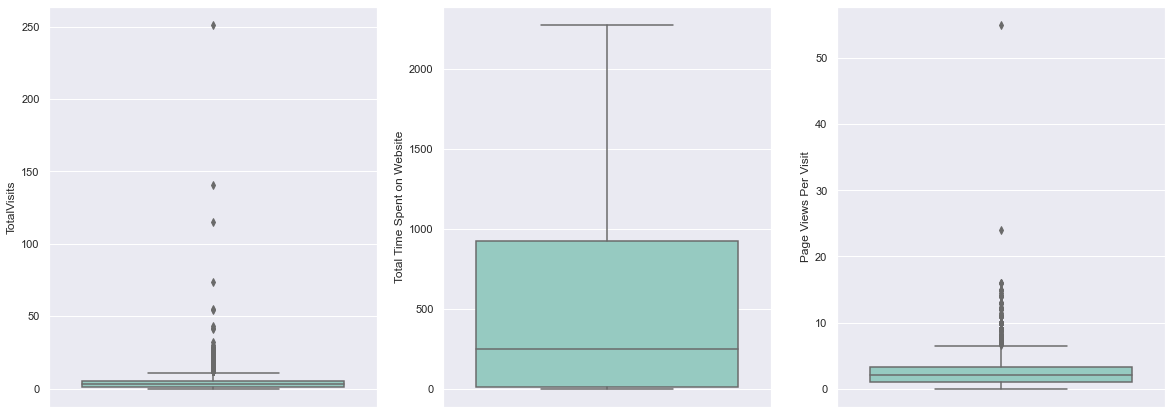

In [60]:
plt.figure(figsize=(20, 25))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = df1)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = df1)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = df1)
plt.show()

In [61]:
df1[numlist].describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9074.000000  9074.000000                  9074.000000   
mean      0.378554     3.456028                   482.887481   
std       0.485053     4.858802                   545.256560   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    11.000000   
50%       0.000000     3.000000                   246.000000   
75%       1.000000     5.000000                   922.750000   
90%       1.000000     7.000000                  1373.000000   
99%       1.000000    17.000000                  1839.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
90%                5.000000  
99%                9.000000  
max               55.000000

In [62]:
# We can see that three of the columns have outliners, so let's put a 99 percentile cap on them.

In [63]:
# Let's cap TotalVisits column with 99 percentile
total_visit_99 = df1['TotalVisits'].quantile(0.99)
df1 = df1[df1["TotalVisits"] < total_visit_99]
df1["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8975.000000
mean        3.192535
std         2.934948
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [64]:
# Let's cap Total Time Spent on Website column with 99 percentile
Total_Time_Spent_on_Website_99 = df1['Total Time Spent on Website'].quantile(0.99)
df1 = df1[df1["Total Time Spent on Website"] < Total_Time_Spent_on_Website_99]
df1["Total Time Spent on Website"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8885.000000
mean      466.280810
std       527.091026
min         0.000000
25%         6.000000
50%       239.000000
75%       887.000000
90%      1343.000000
95%      1516.000000
99%      1728.320000
max      1837.000000
Name: Total Time Spent on Website, dtype: float64

In [65]:
# Let's cap Total Time Spent on Website column with 99 percentile
Total_Time_Spent_on_Website_99 = df1['Total Time Spent on Website'].quantile(0.99)
df1 = df1[df1["Total Time Spent on Website"] < Total_Time_Spent_on_Website_99]
df1["Total Time Spent on Website"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8796.000000
mean      452.987494
std       512.819405
min         0.000000
25%         4.000000
50%       234.000000
75%       861.000000
90%      1317.000000
95%      1484.250000
99%      1656.000000
max      1728.000000
Name: Total Time Spent on Website, dtype: float64

In [66]:
# now we can see that we have capped the outliners.

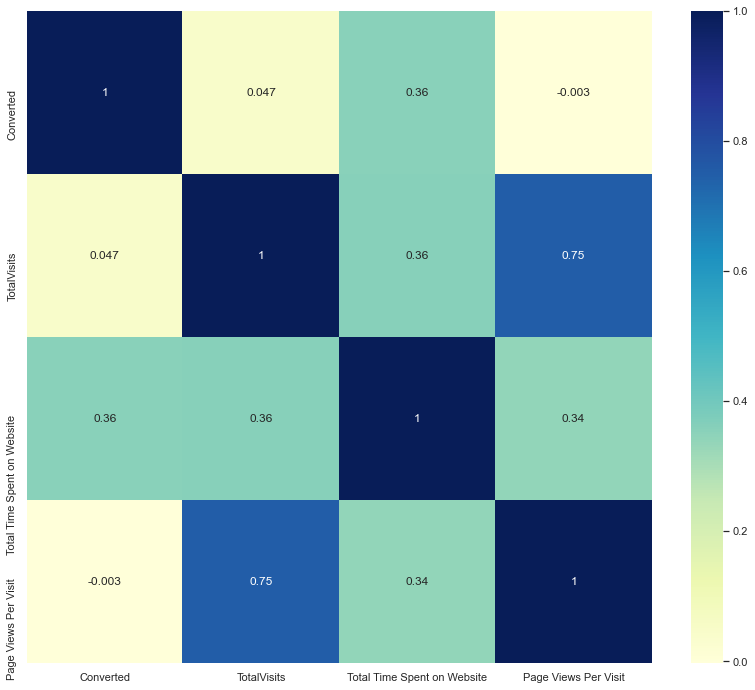

In [67]:
# To check the correlation among varibles
plt.figure(figsize = (14,12))
sns.heatmap(df1[numlist].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [68]:
# We couldn't detect any correlation into it because we only had a small number of factors left.

### Data Preparation - Creating Dummies

In [69]:
#### Converting some binary varibales (No/Yes) to 0/1

var_list = ['Do Not Email','Converted',]

In [70]:
df1[var_list] =df1[var_list].replace({"No":0,"Yes":1})

In [71]:
df1.head().transpose()

0  \
Prospect ID                      7927b2df-8bba-4d29-b9a2-b6e0beafe620   
Lead Origin                                                       API   
Lead Source                                                Olark Chat   
Do Not Email                                                        0   
Converted                                                           0   
TotalVisits                                                       0.0   
Total Time Spent on Website                                         0   
Page Views Per Visit                                              0.0   
Last Activity                                 Page Visited on Website   
Specialization                                   Other_Specialization   
What is your current occupation                            Unemployed   
Tags                                      Interested in other courses   
City                                                           Mumbai   
Last Notable Activity                                        Modified   

                                                                    1  \
Prospect ID                      2a272436-5132-4136-86fa-dcc88c88f482   
Lead Origin                                                       API   
Lead Source                                            Organic Search   
Do Not Email                                                        0   
Converted                                                           0   
TotalVisits                                                       5.0   
Total Time Spent on Website                                       674   
Page Views Per Visit                                              2.5   
Last Activity                                            Email Opened   
Specialization                                   Other_Specialization   
What is your current occupation                            Unemployed   
Tags                                                          Ringing   
City                                                           Mumbai   
Last Notable Activity                                    Email Opened   

                                                                    2  \
Prospect ID                      8cc8c611-a219-4f35-ad23-fdfd2656bd8a   
Lead Origin                                   Landing Page Submission   
Lead Source                                            Direct Traffic   
Do Not Email                                                        0   
Converted                                                           1   
TotalVisits                                                       2.0   
Total Time Spent on Website                                      1532   
Page Views Per Visit                                              2.0   
Last Activity                                            Email Opened   
Specialization                                Business Administration   
What is your current occupation                               Student   
Tags                              Will revert after reading the email   
City                                                           Mumbai   
Last Notable Activity                                    Email Opened   

                                                                    3  \
Prospect ID                      0cc2df48-7cf4-4e39-9de9-19797f9b38cc   
Lead Origin                                   Landing Page Submission   
Lead Source                                            Direct Traffic   
Do Not Email                                                        0   
Converted                                                           0   
TotalVisits                                                       1.0   
Total Time Spent on Website                                       305   
Page Views Per Visit                                              1.0   
Last Activity                                             Unreachable   
Specialization                                  Me

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [72]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df1,dummy],axis=1)

In [73]:
df1.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization  ...  \
0     Other_Specialization  ...   
1     Other_Specialization  ...   
2  Business Administration  ...   
3    Media and Advertising  ...   
4     Other_Specialization  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0  

#### Dropping the repeated variables

In [74]:
# We have created dummies for the below variables, so we can drop them
df1 =df1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'],axis=1)

In [75]:
df1.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  ...  \
0                        0                     0  ...   
1                        0                     0  ...   
2                        0                     0  ...   
3                        0                     0  ...   
4                        0                     0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4       

### Test-Train Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Putting feature variable to X
X = df1.drop(['Prospect ID','Converted'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  ...  \
0                   0                       1  ...   
1                   0                       0  ...   
2                   0                       0  ...   
3                   0                       0  ...   
4                   1                       0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4            

In [78]:
# Putting response variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

### Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
2139             0     0.616744                     0.388113   
2949             0     0.276393                    -0.460143   
3299             0    -1.085009                    -0.884271   
272              0    -0.063957                    -0.237329   
8840             0    -0.063957                    -0.039924   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
2139              0.079379                                    1   
2949             -0.161369                                    1   
3299             -1.124364                                    0   
272               0.320128                                    0   
8840             -0.402118                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
2139                          0                        0   
2949                          0                        0   
3299                          1                        0   
272                           0                        0   
8840                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  ...  \
2139                     0                   1                       0  ...   
2949                     0                   1                       0  ...   
3299                     0                   0                       0  ...   
272                      0                   1                       0  ...   
8840                     0                   1                       0  ...   

      Last Notable Activity_Form Submitted on Website  \
2139                                                0   
2949                                                0   
3299                                                0   
272                                                 0   
8840                                                0   

      Last Notable Activity_Had a Phone Conversation  \
2139                                               0   
2949                                               0   
3299                                               0   
272                                                0   
8840                                               0   

      Last Notable Activity_Modified  \
2139                               1   
2949                               1   
3299                               0   
272                                0   
8840                               0   

      Last Notable Activity_Olark Chat Conversation  \
2139                                              0   
2949                                              0   
3299                                              0   
272                                               0   
8840                                              0   

      Last Notable Activity_Page Visited on Website  \
2139                                              0   
2949                                              0   
3299                                              0   
272                                               0   
8840                                              0   

      Last Notable Activity_Resubscribed to emails  \
2139                                             0   
2949                                             0   
3299                                             0   
272                                              0   
8840                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
2139                               0                                  0   
2949                               0                                  0   
3299                               1                                  0   
272                                0                                  0   
8840                               1                                  0   

      Last Notable Acti

In [82]:
### Checking the Conversion Rate

print(" The Conversion rate is ", (sum(df1['Converted'])/len(df1['Converted'].index))*100)

 The Conversion rate is  37.232833105957255


### Looking at Correlations

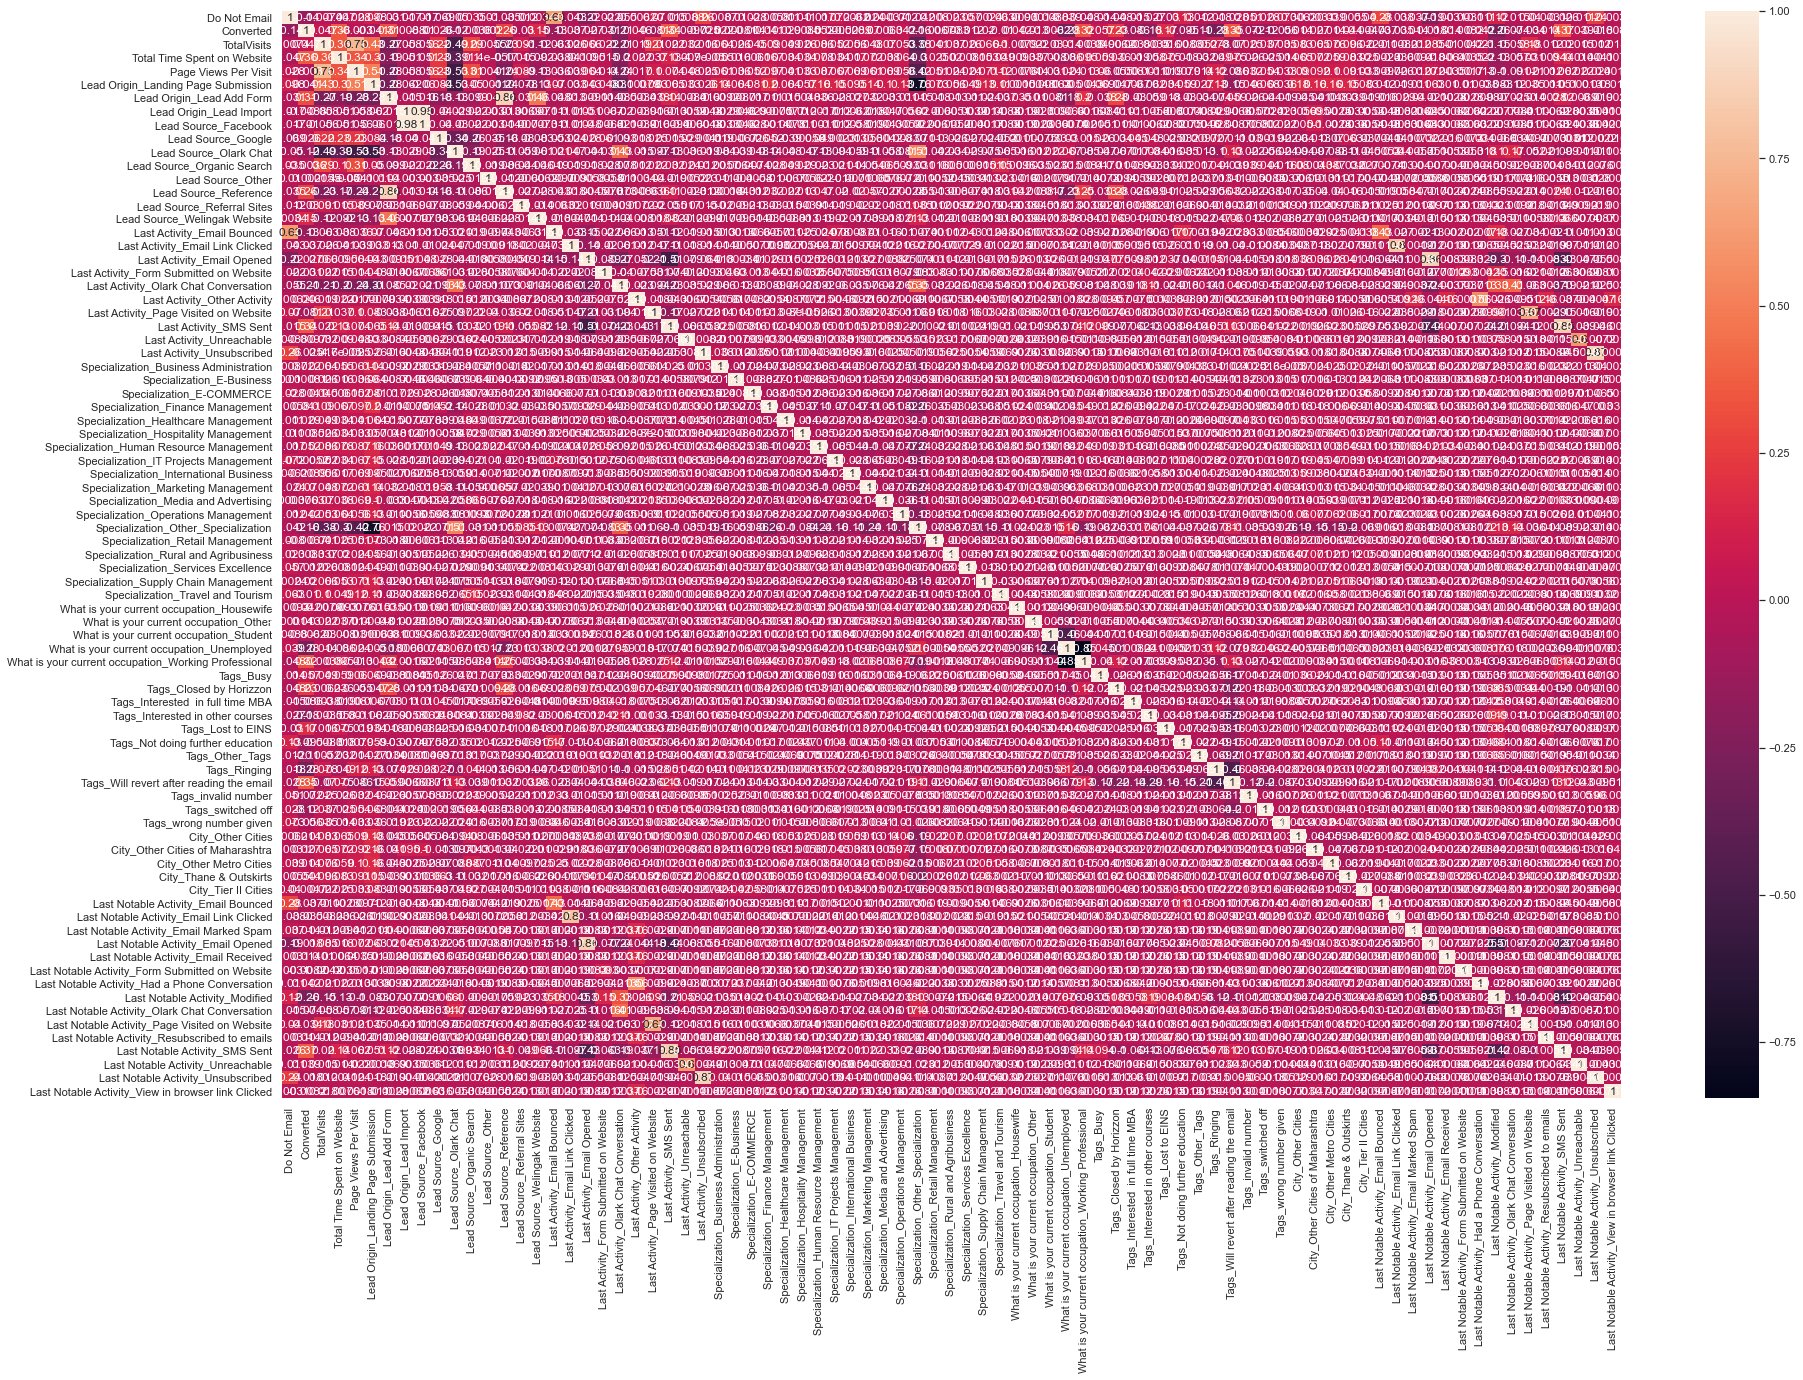

In [83]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df1.corr(),annot = True)
plt.show()

In [84]:
conv_corr = df1.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983683
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.870291
Lead Origin_Lead Add Form              Lead Source_Reference                            0.864790
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861026
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.852433
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.801208
TotalVisits                            Page Views Per Visit                             0.752441
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.674969
Do Not Email                           Last Activity_Email Bounced                      0.627812
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.597672
dtype: float64

In [85]:
# Dropping highly correlated features
X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Lead Source_Reference','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Lead Source_Reference','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [86]:
conv_corr = X_train.corr()

In [87]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

TotalVisits                            Page Views Per Visit                              0.751687
Do Not Email                           Last Activity_Email Bounced                       0.606673
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.564903
Lead Source_Olark Chat                 Specialization_Other_Specialization               0.508450
Page Views Per Visit                   Lead Origin_Landing Page Submission               0.500319
Lead Origin_Lead Add Form              Lead Source_Welingak Website                      0.448173
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation             0.432917
TotalVisits                            Lead Origin_Landing Page Submission               0.430628
Last Activity_Email Bounced            Last Notable Activity_Email Bounced               0.408112
Last Activity_Olark Chat Conversation  Last Notable Activity_Olark Chat Conversation     0.406539
dtype: float64

# Model Building

#### Running Your First Training Model

In [88]:
import statsmodels.api as sm

In [89]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6157
Model:                            GLM   Df Residuals:                     6085
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1578.7
Date:                Tue, 12 Apr 2022   Deviance:                       3157.3
Time:                        19:31:56   Pearson chi2:                 1.31e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1279      1.624     -2.542      0.011      -7.310      -0.946
Do Not Email                                            -1.2375      0.269     -4.607      0.000      -1.764      -0.711
TotalVisits                                              0.1460      0.074      1.986      0.047       0.002       0.290
Total Time Spent on Website                              1.0969      0.055     20.036      0.000       0.990       1.204
Page Views Per Visit                                    -0.1145      0.078     -1.476      0.140      -0.267       0.038
Lead Origin_Landing Page Submission                     -1.2905      0.189     -6.841      0.000      -1.660      -0.921
Lead Origin_Lead Add Form                                3.1728      0.369      8.606      0.000       2.450       3.895
Lead Origin_Lead Import                                  0.5970      0.757      0.789      0.430      -0.886       2.080
Lead Source_Google                                       0.2073      0.132      1.573      0.116      -0.051       0.466
Lead Source_Olark Chat                                   1.0635      0.206      5.161      0.000       0.660       1.467
Lead Source_Organic Search                               0.2623      0.177      1.483      0.138      -0.084       0.609
Lead Source_Other                                        0.3312      1.028      0.322      0.747      -1.684       2.346
Lead Source_Referral Sites                               0.1017      0.417      0.244      0.808      -0.716       0.920
Lead Source_Welingak Website                            23.3481   2.01e+04      0.001      0.999   -3.93e+04    3.93e+04
Last Activity_Email Bounced                             -0.5562      0.656     -0.848      0.396      -1.841       0.729
Last Activity_Email Link Clicked                        -1.0237      0.399     -2.566      0.010      -1.806      -0.242
Last Activity_Email Opened                              -0.5903      0.295     -2.000      0.046      -1.169      -0.012
Last Activity_Form Submitted on Website                 -0.4645      0.511     -0.909      0.363      -1.466       0.537
Last Activity_Olark Chat Conversation                   -0.8903      0.346     -2.576      0.010      -1.568      -0.213
Last Activity_Other Activity                             0.9466      0.958      0.988      0.323      -0.932       2.825
Last Activity_Page Visited on Website                   -0.8301      0.344     -2.413      0.016      -1.504      -0.156
Last Activity_SMS Sent                                   1.4158      0.289      4.905      0.000       0.850       1.981
Last Activity_Unreachable                                0

### Feature Selection Using RFE

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 45),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Other', False, 42),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Opened', False, 22),
 ('Last Activity_Form Submitted on Website', False, 28),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 41),
 ('Last Activity_Unsubscribed', False, 9),
 ('Special

In [93]:
# Varibales accepted by RFE has been saved under the col.
col = X_train.columns[rfe.support_]

In [94]:
# It provides us the list of all of the varibles rejected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specializatio

#### Assessing the model with StatsModels

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6157
Model:                            GLM   Df Residuals:                     6141
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1885.9
Date:                Tue, 12 Apr 2022   Deviance:                       3771.8
Time:                        19:32:07   Pearson chi2:                 1.33e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9778      0.369     -2.649      0.008      -1.701      -0.254
Lead Origin_Landing Page Submission                     -1.4908      0.156     -9.550      0.000      -1.797      -1.185
Lead Origin_Lead Add Form                                1.6981      0.322      5.271      0.000       1.067       2.330
Lead Source_Welingak Website                            23.3879   2.01e+04      0.001      0.999   -3.94e+04    3.94e+04
Last Activity_Other Activity                             1.9659      0.651      3.020      0.003       0.690       3.242
Last Activity_SMS Sent                                   1.9808      0.092     21.594      0.000       1.801       2.161
Specialization_Other_Specialization                     -1.8737      0.159    -11.816      0.000      -2.185      -1.563
What is your current occupation_Unemployed              -1.9030      0.333     -5.714      0.000      -2.556      -1.250
What is your current occupation_Working Professional     0.8614      0.406      2.122      0.034       0.066       1.657
Tags_Busy                                                3.6462      0.263     13.842      0.000       3.130       4.162
Tags_Closed by Horizzon                                  9.3591      0.741     12.638      0.000       7.908      10.811
Tags_Interested  in full time MBA                      -21.4794    2.1e+04     -0.001      0.999   -4.11e+04    4.11e+04
Tags_Lost to EINS                                        8.9034      0.619     14.383      0.000       7.690      10.117
Tags_Will revert after reading the email                 4.0418      0.158     25.522      0.000       3.731       4.352
Last Notable Activity_Modified                          -1.6725      0.097    -17.330      0.000      -1.862      -1.483
Last Notable Activity_Olark Chat Conversation           -1.6597      0.359     -4.617      0.000      -2.364      -0.955
========================================================================================================================
"""

In [96]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
# it is basically predicting the probabilit of getting a 1, for the specific lead
y_train_pred[:10]

2139    0.945802
2949    0.002366
3299    0.992154
272     0.329014
8840    0.958586
6826    0.958586
4319    0.329014
1235    0.084316
2830    0.016902
498     0.418311
dtype: float64

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.94580182, 0.00236644, 0.99215419, 0.32901398, 0.95858591,
       0.95858591, 0.32901398, 0.08431555, 0.01690246, 0.41831094])

##### Creating a dataframe with the actual conversion rate and the predicted probabilities

In [98]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Prospect_ID
0        1      0.945802         2139
1        0      0.002366         2949
2        1      0.992154         3299
3        0      0.329014          272
4        1      0.958586         8840

##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [99]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Convert  Convert_Prob  Prospect_ID  predicted
0        1      0.945802         2139          1
1        0      0.002366         2949          0
2        1      0.992154         3299          1
3        0      0.329014          272          0
4        1      0.958586         8840          1

In [100]:
# Here in the above columns we have convert column as what has happened and 

In [101]:
from sklearn import metrics

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3716  149]
 [ 614 1678]]


In [103]:
# Predicted         not_converted    churn
# Actual
# not_converted        3716      149
# churn                614       1678

In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8760760110443397


# Checking VIFs


In [105]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        Lead Source_Welingak Website  1.33
9                             Tags_Closed by Horizzon  1.28
8                                           Tags_Busy  1.08
14      Last Notable Activity_Olark Chat Conversation  1.07
11                                  Tags_Lost to EINS  1.06
10                  Tags_Interested  in full time MBA  1.04
3                        Last Activity_Other Activity  1.01
7   What is your current occupation_Working Profes...  0.78
1                           Lead Origin_Lead Add Form  0.70
0                 Lead Origin_Landing Page Submission  0.35
5                 Specialization_Other_Specialization  0.33
6          What is your current occupation_Unemployed  0.28
13                     Last Notable Activity_Modified  0.14
4                              Last Activity_SMS Sent  0.05
12           Tags_Will revert after reading the email  0.04

In [107]:
col = col.drop('Tags_Interested  in full time MBA', 1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

#### Let's re-run the model using the selected variables

In [108]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6157
Model:                            GLM   Df Residuals:                     6142
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1887.5
Date:                Tue, 12 Apr 2022   Deviance:                       3775.0
Time:                        19:32:10   Pearson chi2:                 1.34e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0763      0.360     -2.991      0.003      -1.781      -0.371
Lead Origin_Landing Page Submission                     -1.4744      0.155     -9.508      0.000      -1.778      -1.170
Lead Origin_Lead Add Form                                1.7121      0.323      5.304      0.000       1.079       2.345
Lead Source_Welingak Website                            22.3741   1.22e+04      0.002      0.999   -2.39e+04    2.39e+04
Last Activity_Other Activity                             1.9679      0.652      3.021      0.003       0.691       3.245
Last Activity_SMS Sent                                   1.9849      0.092     21.635      0.000       1.805       2.165
Specialization_Other_Specialization                     -1.8588      0.158    -11.784      0.000      -2.168      -1.550
What is your current occupation_Unemployed              -1.8479      0.327     -5.655      0.000      -2.488      -1.207
What is your current occupation_Working Professional     0.9105      0.400      2.277      0.023       0.127       1.694
Tags_Busy                                                3.6721      0.264     13.934      0.000       3.156       4.189
Tags_Closed by Horizzon                                  9.3881      0.740     12.679      0.000       7.937      10.839
Tags_Lost to EINS                                        8.9328      0.619     14.432      0.000       7.720      10.146
Tags_Will revert after reading the email                 4.0702      0.158     25.718      0.000       3.760       4.380
Last Notable Activity_Modified                          -1.6741      0.096    -17.358      0.000      -1.863      -1.485
Last Notable Activity_Olark Chat Conversation           -1.6580      0.359     -4.616      0.000      -2.362      -0.954
========================================================================================================================
"""

In [109]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [110]:
y_train_pred[:10]

array([0.94583721, 0.00229965, 0.99217891, 0.32898332, 0.95815091,
       0.95815091, 0.32898332, 0.08417566, 0.01649995, 0.41863394])

In [111]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Prospect_ID
0        1      0.945837         2139
1        0      0.002300         2949
2        1      0.992179         3299
3        0      0.328983          272
4        1      0.958151         8840

In [112]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Convert  Convert_Prob  Prospect_ID  predicted
0        1      0.945837         2139          1
1        0      0.002300         2949          0
2        1      0.992179         3299          1
3        0      0.328983          272          0
4        1      0.958151         8840          1

In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3716  149]
 [ 614 1678]]


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8760760110443397


In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        Lead Source_Welingak Website  1.33
9                             Tags_Closed by Horizzon  1.28
8                                           Tags_Busy  1.07
13      Last Notable Activity_Olark Chat Conversation  1.07
10                                  Tags_Lost to EINS  1.06
3                        Last Activity_Other Activity  1.01
7   What is your current occupation_Working Profes...  0.77
1                           Lead Origin_Lead Add Form  0.70
0                 Lead Origin_Landing Page Submission  0.35
5                 Specialization_Other_Specialization  0.33
6          What is your current occupation_Unemployed  0.28
12                     Last Notable Activity_Modified  0.14
4                              Last Activity_SMS Sent  0.05
11           Tags_Will revert after reading the email  0.04

In [116]:
col = col.drop('Lead Source_Welingak Website', 1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Let's re-run the model using the selected variables.


In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6157
Model:                            GLM   Df Residuals:                     6143
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1895.4
Date:                Tue, 12 Apr 2022   Deviance:                       3790.9
Time:                        19:32:12   Pearson chi2:                 1.61e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1418      0.362     -3.153      0.002      -1.851      -0.432
Lead Origin_Landing Page Submission                     -1.4398      0.155     -9.298      0.000      -1.743      -1.136
Lead Origin_Lead Add Form                                2.3443      0.290      8.079      0.000       1.776       2.913
Last Activity_Other Activity                             1.9605      0.652      3.005      0.003       0.682       3.239
Last Activity_SMS Sent                                   1.9755      0.092     21.577      0.000       1.796       2.155
Specialization_Other_Specialization                     -1.8199      0.158    -11.548      0.000      -2.129      -1.511
What is your current occupation_Unemployed              -1.8530      0.329     -5.638      0.000      -2.497      -1.209
What is your current occupation_Working Professional     0.8923      0.402      2.221      0.026       0.105       1.680
Tags_Busy                                                3.7157      0.264     14.050      0.000       3.197       4.234
Tags_Closed by Horizzon                                  9.4061      0.741     12.693      0.000       7.954      10.858
Tags_Lost to EINS                                        8.9674      0.619     14.478      0.000       7.753      10.181
Tags_Will revert after reading the email                 4.1135      0.160     25.713      0.000       3.800       4.427
Last Notable Activity_Modified                          -1.6745      0.096    -17.399      0.000      -1.863      -1.486
Last Notable Activity_Olark Chat Conversation           -1.6617      0.358     -4.637      0.000      -2.364      -0.959
========================================================================================================================
"""

In [118]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [119]:
y_train_pred[:10]

array([0.94575506, 0.00221797, 0.99567325, 0.33157228, 0.95665882,
       0.95665882, 0.33157228, 0.08505654, 0.01577502, 0.42044863])

In [120]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Prospect_ID
0        1      0.945755         2139
1        0      0.002218         2949
2        1      0.995673         3299
3        0      0.331572          272
4        1      0.956659         8840

In [121]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Convert  Convert_Prob  Prospect_ID  predicted
0        1      0.945755         2139          1
1        0      0.002218         2949          0
2        1      0.995673         3299          1
3        0      0.331572          272          0
4        1      0.956659         8840          1

In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3715  150]
 [ 615 1677]]


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8757511775215202


## Metrics beyond simply accuracy

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
# senstivity/recall/true +ev rate -> no of actual yes correctly predicted by total no os yes.
# you can say that your accuracy is 87% but your senstivity turns out to be 73%.
TP / float(TP+FN)

0.731675392670157

In [126]:
# Let us calculate specificity
# specificity -> It takes care of negative part, it means no of actual no's by total no of no's
TN / float(TN+FP)

0.9611901681759379

In [127]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.03880983182406209


In [128]:
# positive predictive value
# precision - Which is actually yes and has been predicted as yes
print (TP / float(TP+FP))

0.9178981937602627


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8579676674364896


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

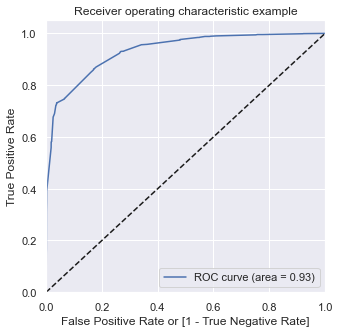

In [132]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

Convert  Convert_Prob  Prospect_ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0        1      0.945755         2139          1    1    1    1    1    1   
1        0      0.002218         2949          0    1    0    0    0    0   
2        1      0.995673         3299          1    1    1    1    1    1   
3        0      0.331572          272          0    1    1    1    1    0   
4        1      0.956659         8840          1    1    1    1    1    1   
5        1      0.956659         6826          1    1    1    1    1    1   
6        0      0.331572         4319          0    1    1    1    1    0   
7        0      0.085057         1235          0    1    0    0    0    0   
8        0      0.015775         2830          0    1    0    0    0    0   
9        0      0.420449          498          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    0    0    0    0    0  
2    1    1    1    1    1  
3    0    0    0    0    0  
4    1    1    1    1    1  
5    1    1    1    1    1  
6    0    0    0    0    0  
7    0    0    0    0    0  
8    0    0    0    0    0  
9    0    0    0    0    0

In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.372259  1.000000  0.000000
0.1   0.1  0.767744  0.956370  0.655886
0.2   0.2  0.804125  0.930628  0.729107
0.3   0.3  0.806399  0.929319  0.733506
0.4   0.4  0.840994  0.858639  0.830530
0.5   0.5  0.875751  0.731675  0.961190
0.6   0.6  0.875589  0.731239  0.961190
0.7   0.7  0.874127  0.723822  0.963260
0.8   0.8  0.832548  0.582461  0.980854
0.9   0.9  0.773916  0.397033  0.997413


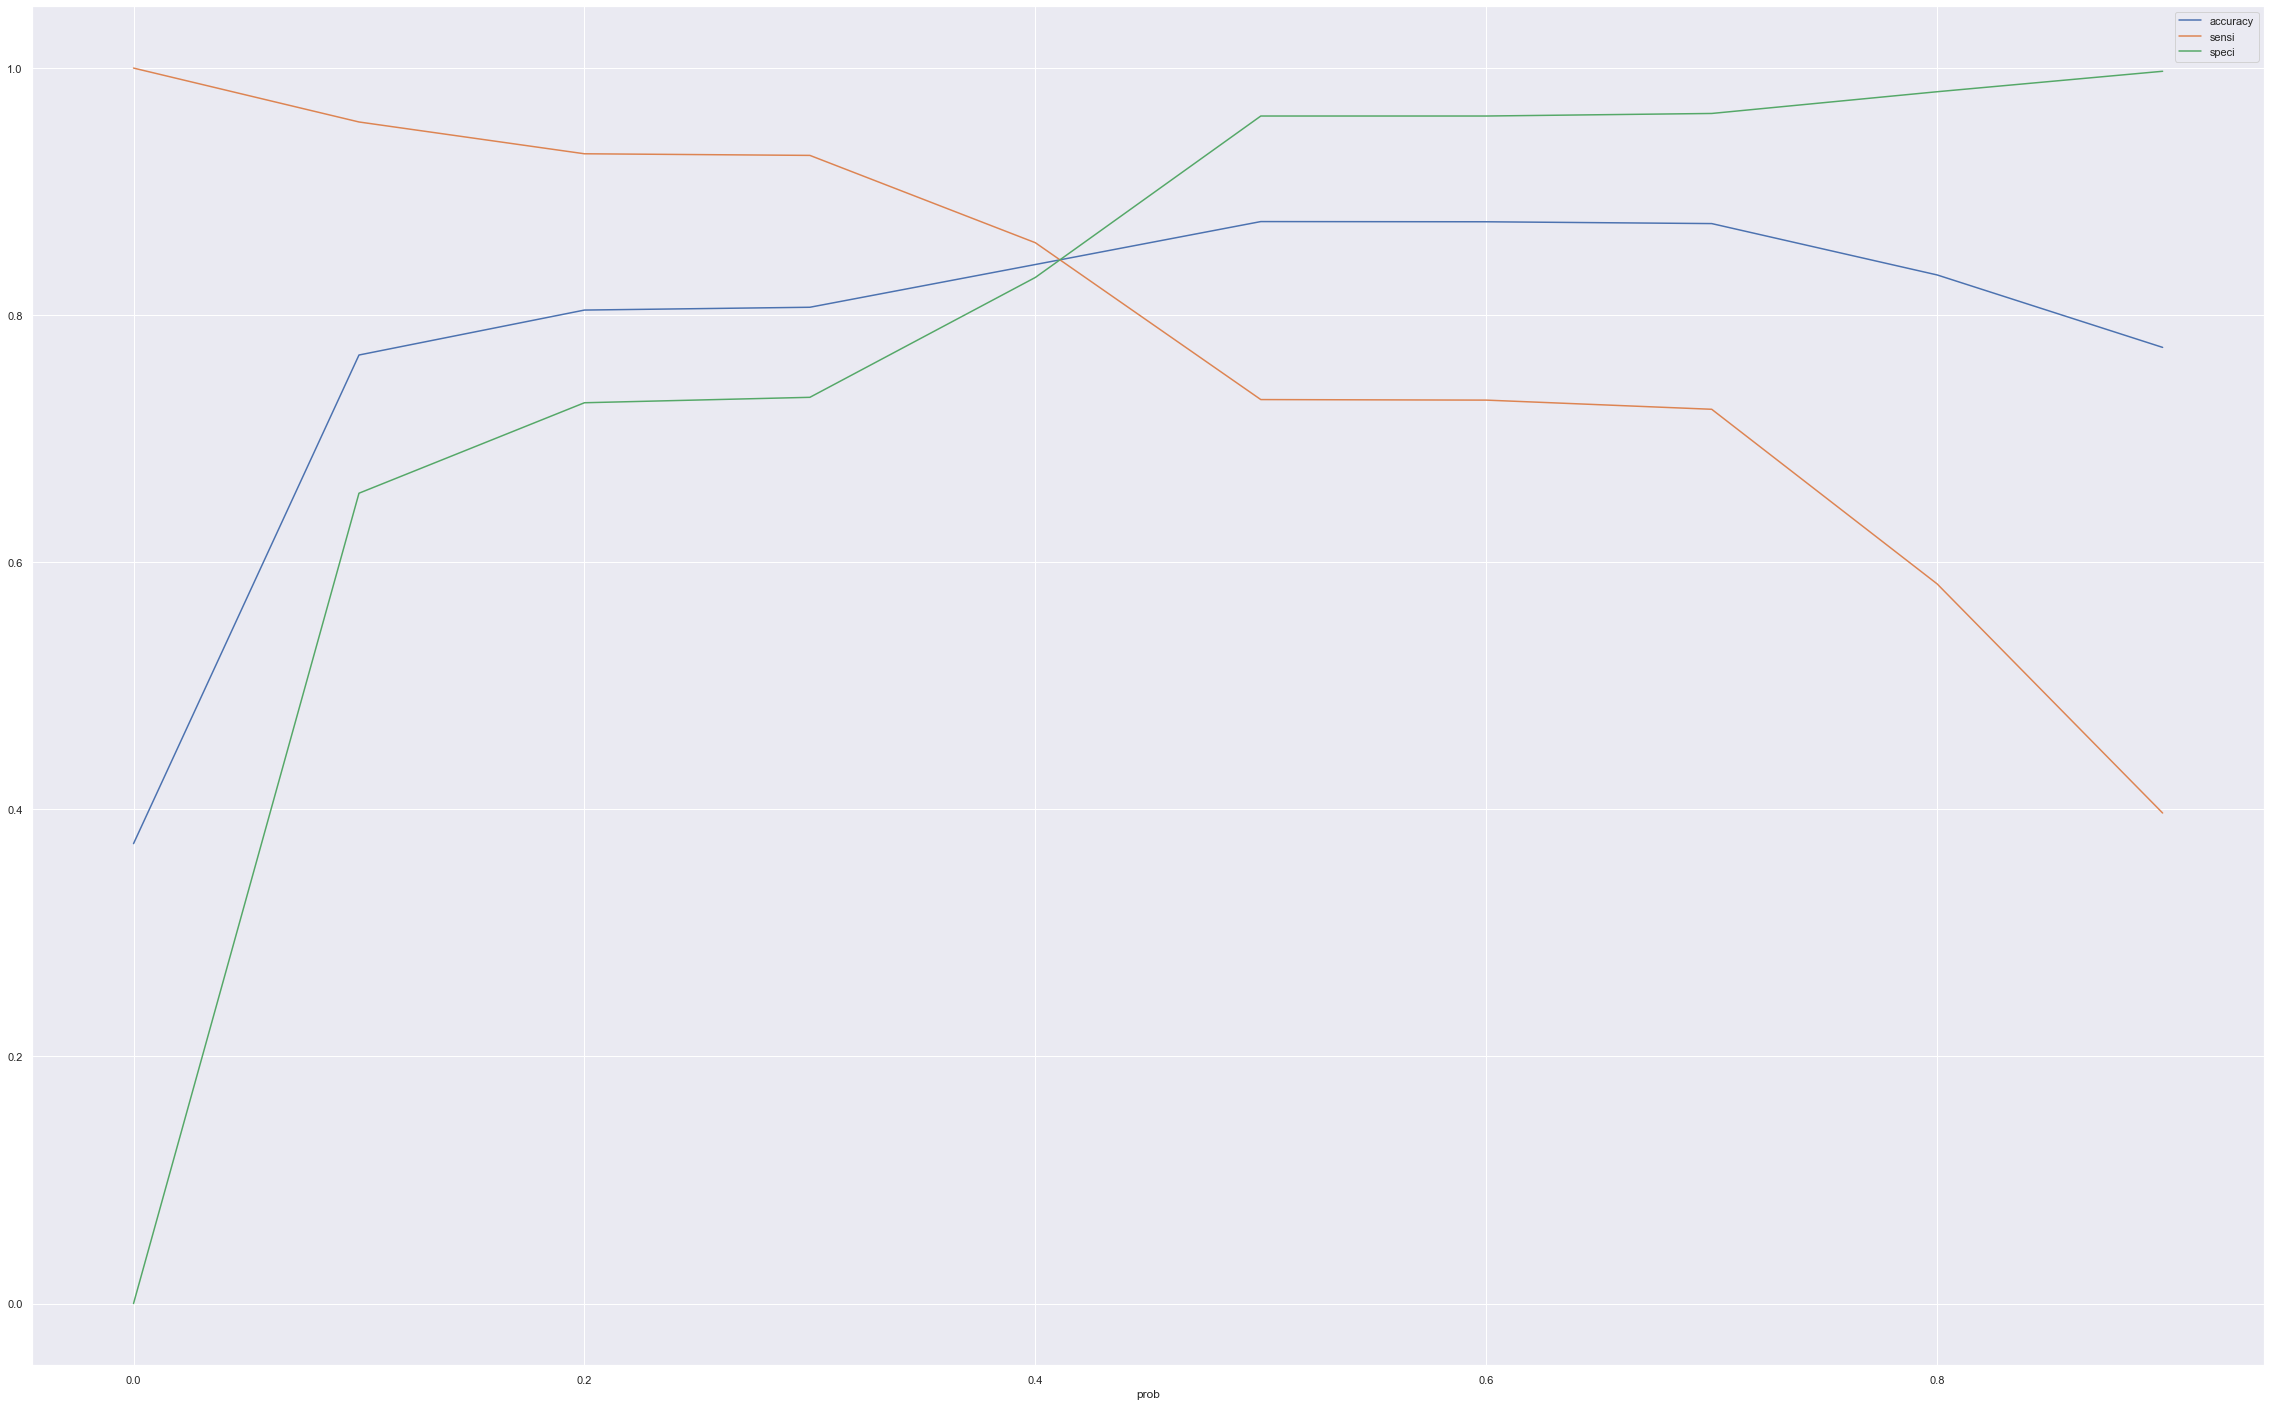

In [135]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [136]:
# From the curve above, 0.42 is the optimum point to take it as a cutoff probability

In [137]:
# Let us make the final prediction using 0.42 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Prospect_ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0        1      0.945755         2139          1    1    1    1    1    1   
1        0      0.002218         2949          0    1    0    0    0    0   
2        1      0.995673         3299          1    1    1    1    1    1   
3        0      0.331572          272          0    1    1    1    1    0   
4        1      0.956659         8840          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1                1  
1    0    0    0    0    0                0  
2    1    1    1    1    1                1  
3    0    0    0    0    0                0  
4    1    1    1    1    1                1

# Evaluating model performance on training data

In [138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted)
confusion2

array([[3246,  619],
       [ 345, 1947]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8434302420009745

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.849476439790576

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8398447606727037

In [143]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.16015523932729625


In [144]:
# Positive predictive value
# precision -> predicted yes are actually yes
print (TP / float(TP+FP))

0.7587685113016368


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9039264828738512


# Precision and Recall

In [146]:
#Looking at the confusion matrix again

In [147]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3715,  150],
       [ 615, 1677]], dtype=int64)

##### Precision
TP / TP + FP

In [148]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9178981937602627

##### Recall
TP / TP + FN

In [149]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.731675392670157

## Precision and recall tradeoff

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
y_train_pred_final.Convert, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6152    0
 6153    1
 6154    0
 6155    0
 6156    0
 Name: Convert, Length: 6157, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6152    0
 6153    1
 6154    0
 6155    1
 6156    0
 Name: predicted, Length: 6157, dtype: int64)

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

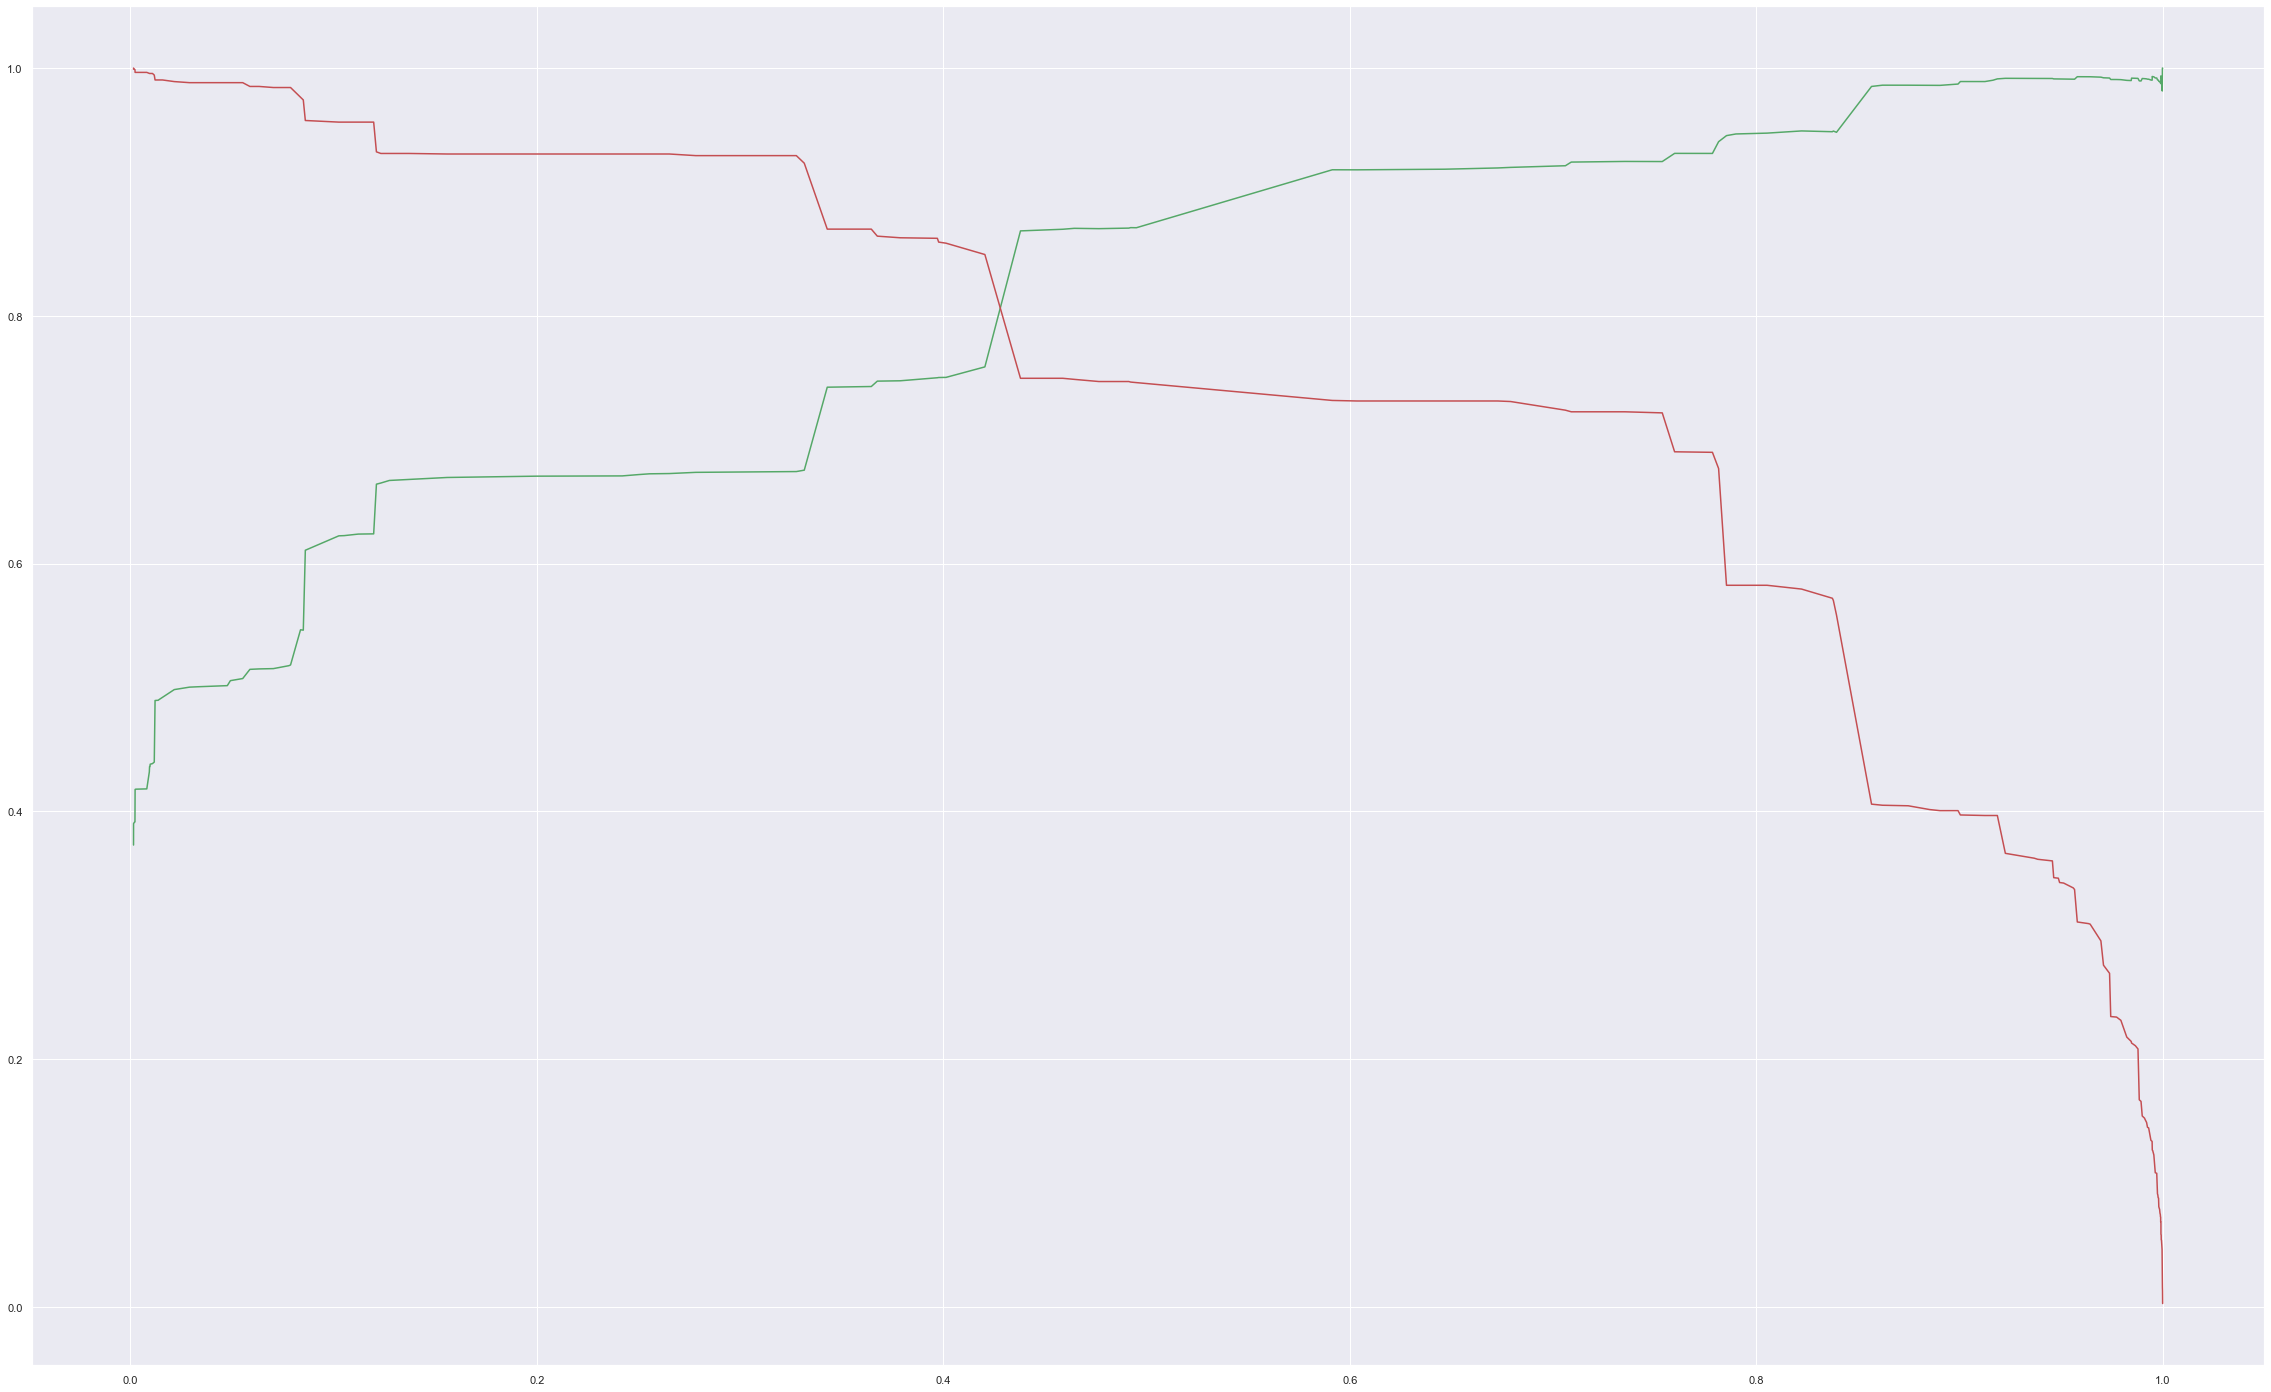

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [154]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [155]:
X_test = X_test[col]
X_test.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
981                                     0                          0   
8849                                    1                          0   
8315                                    0                          0   
6443                                    1                          0   
8703                                    0                          0   

      Last Activity_Other Activity  Last Activity_SMS Sent  \
981                              0                       0   
8849                             0                       0   
8315                             0                       0   
6443                             0                       0   
8703                             0                       0   

      Specialization_Other_Specialization  \
981                                     1   
8849                                    0   
8315                                    1   
6443                                    0   
8703                                    1   

      What is your current occupation_Unemployed  \
981                                            1   
8849                                           1   
8315                                           1   
6443                                           1   
8703                                           1   

      What is your current occupation_Working Professional  Tags_Busy  \
981                                                   0             0   
8849                                                  0             0   
8315                                                  0             0   
6443                                                  0             0   
8703                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  \
981                         0                  0   
8849                        0                  0   
8315                        0                  0   
6443                        0                  0   
8703                        0                  0   

      Tags_Will revert after reading the email  \
981                                          0   
8849                                         0   
8315                                         1   
6443                                         0   
8703                                         0   

      Last Notable Activity_Modified  \
981                                1   
8849                               0   
8315                               1   
6443                               1   
8703                               1   

      Last Notable Activity_Olark Chat Conversation  
981                                               0  
8849                                              0  
8315                                              0  
6443                                              0  
8703                                              0

In [156]:
X_test_sm = sm.add_constant(X_test)

In [157]:
y_test_pred = res.predict(X_test_sm)

In [158]:
y_test_pred[:10]

981     0.001518
8849    0.011722
8315    0.085057
6443    0.002218
8703    0.001518
6056    0.011722
5054    0.495030
2123    0.085057
8158    0.085057
8919    0.001518
dtype: float64

In [159]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
# Let's see the head

y_pred_1.head()

0
981   0.001518
8849  0.011722
8315  0.085057
6443  0.002218
8703  0.001518

In [161]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting Pros_ID to index

y_test_df['Prospect_ID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head(20)

Converted  Prospect_ID         0
0           0          981  0.001518
1           0         8849  0.011722
2           0         8315  0.085057
3           0         6443  0.002218
4           0         8703  0.001518
5           0         6056  0.011722
6           0         5054  0.495030
7           0         2123  0.085057
8           1         8158  0.085057
9           0         8919  0.001518
10          0           43  0.420449
11          1         4584  0.964330
12          0         1787  0.002218
13          0         9173  0.021556
14          0          697  0.839509
15          0         8250  0.495030
16          1         3619  0.781501
17          1         3151  0.837967
18          1         3907  0.839509
19          0         2903  0.002218

In [166]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [167]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect_ID','Converted','Converted_Prob'], axis=1)


In [168]:
y_pred_final.head(20)

Prospect_ID  Converted  Converted_Prob
0           981          0        0.001518
1          8849          0        0.011722
2          8315          0        0.085057
3          6443          0        0.002218
4          8703          0        0.001518
5          6056          0        0.011722
6          5054          0        0.495030
7          2123          0        0.085057
8          8158          1        0.085057
9          8919          0        0.001518
10           43          0        0.420449
11         4584          1        0.964330
12         1787          0        0.002218
13         9173          0        0.021556
14          697          0        0.839509
15         8250          0        0.495030
16         3619          1        0.781501
17         3151          1        0.837967
18         3907          1        0.839509
19         2903          0        0.002218

In [169]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.42%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [170]:
# Now let us calculate the lead score

y_pred_final['Prospect_ID'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

Prospect_ID  Converted  Converted_Prob  final_predicted
0             0          0        0.001518                0
1             1          0        0.011722                0
2             9          0        0.085057                0
3             0          0        0.002218                0
4             0          0        0.001518                0
5             1          0        0.011722                0
6            50          0        0.495030                1
7             9          0        0.085057                0
8             9          1        0.085057                0
9             0          0        0.001518                0
10           42          0        0.420449                1
11           96          1        0.964330                1
12            0          0        0.002218                0
13            2          0        0.021556                0
14           84          0        0.839509                1
15           50          0        0.495030                1
16           78          1        0.781501                1
17           84          1        0.837967                1
18           84          1        0.839509                1
19            0          0        0.002218                0

In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8495642288745737

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1422,  234],
       [ 163,  820]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8341810783316378

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.8586956521739131

The final model has a Sensitivity of 0.839, which means it can correctly predict 83.9 percent of all converted customers (Positive conversion).
The final model has a precision of 0.917, which means that 91.7 percent of predicted hot leads are actually hot leads.